<a href="https://colab.research.google.com/github/ruhaan0001/CognitiveComputing/blob/main/ass8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Implement logistic regression on the Iris dataset.

In [1]:
# Import Necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn                 import datasets
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Load the dataset
np.set_printoptions(precision = 3)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Data Splitting (80% training data, 20% testing data)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = None)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)  # Compute mean/std & transform training data
x_test = scaler.transform(x_test)        # Use same scaling on test data
# Train the Logistic Regression model
model = LogisticRegression(solver="lbfgs")
model.fit(x_train, y_train)
# Predictions
y_pred = model.predict(x_test)
print(y_pred)





[1 2 0 0 1 1 1 2 1 1 2 1 0 1 1 0 2 2 0 0 1 2 0 0 0 0 0 0 0 2]


In [2]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix: 
[[13  0  0]
 [ 0 10  1]
 [ 0  0  6]]


<Figure size 600x400 with 0 Axes>

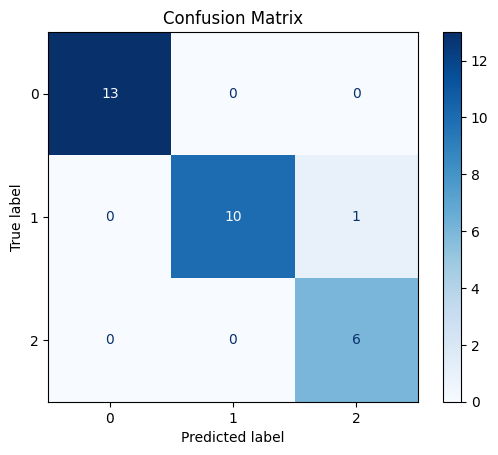

In [3]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

# Confusion Matrix Visualiztion
plt.figure(figsize = (6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.show()


In [4]:
# Compute Cross-Entropy Loss
from sklearn.metrics import log_loss
# Get predictions (probabilities)
y_pred_probs = model.predict_proba(x_test)

# Compute Cross-Entropy Loss
loss = log_loss(y_test, y_pred_probs)
print(f"Cross-Entropy Loss on Iris Dataset: {loss:.4f}")

Cross-Entropy Loss on Iris Dataset: 0.1641
